In [1]:
import numpy as np
import matplotlib.pyplot as plt

import data.data as data
import data.acf as acf
import error.error as error
import reservoir.reservoir as res

In [2]:
LORENZ_LYAPUNOV = 0.91

In [3]:
del_t = 0.02
u = data.generate_lorenz_63(del_t=del_t, steps=4000, washout=3500)
T = u.shape[0]
time = np.arange(T) * del_t * LORENZ_LYAPUNOV

Text(0, 0.5, 'Phase Space')

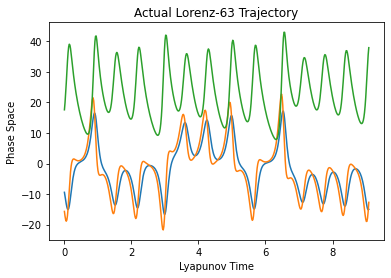

In [4]:
plt.figure(facecolor="white")
plt.plot(time, u[:, 0], label="x")
plt.plot(time, u[:, 1], label="y")
plt.plot(time, u[:, 2], label="z")
plt.title("Actual Lorenz-63 Trajectory")

plt.xlabel("Lyapunov Time")
plt.ylabel("Phase Space")

Text(0, 0.5, 'Autocorrelation')

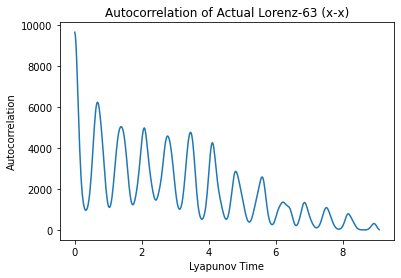

In [5]:
acfs = acf.compute_acfs(u, "x", "x")
plt.figure(facecolor="white")
plt.plot(time, acfs)
plt.title("Autocorrelation of Actual Lorenz-63 (x-x)")
plt.xlabel("Lyapunov Time")
plt.ylabel("Autocorrelation")

In [6]:
seed = 42
W_out, r, A, W_in = res.train_p(u, rho=0.6, s_in=1, R=500, beta=10e-4, seed=seed)
test_preds = res.predict(u[0], W_out, T, A, W_in)

/Users/leoli/Desktop/uni/Honours/thesis-code/reservoir/reservoir.py:89: ComplexWarning: Casting complex values to real discards the imaginary part
  r[t] = next_res(
/Users/leoli/Desktop/uni/Honours/thesis-code/reservoir/reservoir.py:152: ComplexWarning: Casting complex values to real discards the imaginary part
  u_hat[t] = W_out(curr_res, p)


Text(0, 0.5, 'Phase Space')

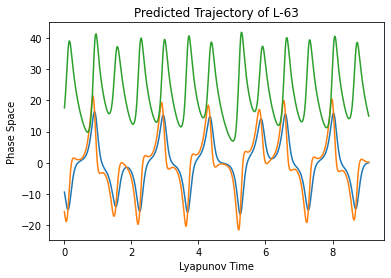

In [7]:
plt.figure(facecolor="white")
plt.plot(time, test_preds[:, 0], label="x")
plt.plot(time, test_preds[:, 1], label="y")
plt.plot(time, test_preds[:, 2], label="z")
plt.title("Predicted Trajectory of L-63")
plt.xlabel("Lyapunov Time")
plt.ylabel("Phase Space")

In [8]:
error.RMSE(u, test_preds)

array([ 9.51588022, 11.04439149, 10.39846629])

Text(0, 0.5, 'Phase Space')

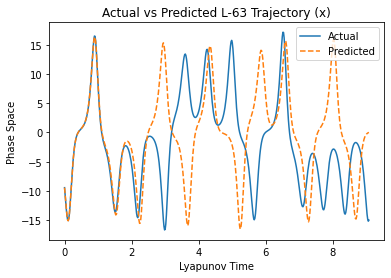

In [9]:
plt.figure(facecolor="white")
plt.plot(time, u[:, 0], label="Actual")
plt.plot(time, test_preds[:, 0], label="Predicted", linestyle="dashed")

plt.legend()

plt.title("Actual vs Predicted L-63 Trajectory (x)")

plt.xlabel("Lyapunov Time")
plt.ylabel("Phase Space")

Text(0, 0.5, 'Phase Space')

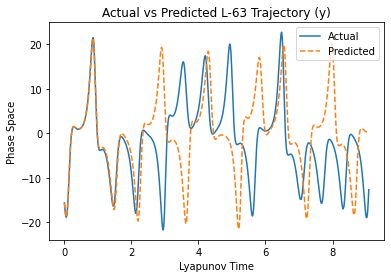

In [10]:
plt.figure(facecolor="white")
plt.plot(time, u[:, 1], label="Actual")
plt.plot(time, test_preds[:, 1], label="Predicted", linestyle="dashed")

plt.legend()

plt.title("Actual vs Predicted L-63 Trajectory (y)")

plt.xlabel("Lyapunov Time")
plt.ylabel("Phase Space")

Text(0, 0.5, 'Phase Space')

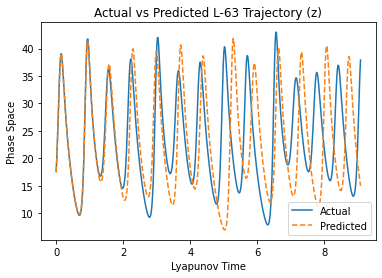

In [11]:
plt.figure(facecolor="white")
plt.plot(time, u[:, 2], label="Actual")
plt.plot(time, test_preds[:, 2], label="Predicted", linestyle="dashed")

plt.legend()

plt.title("Actual vs Predicted L-63 Trajectory (z)")

plt.xlabel("Lyapunov Time")
plt.ylabel("Phase Space")

In [12]:
moving_rmses = np.array([error.RMSE(u[:t], test_preds[:t]) for t in range(1, T)])

Text(0, 0.5, 'RMSE')

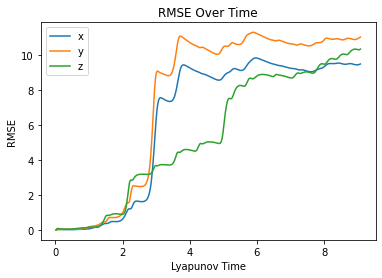

In [13]:
plt.figure(facecolor="white")
plt.plot(time[1:], moving_rmses[:, 0], label="x")
plt.plot(time[1:], moving_rmses[:, 1], label="y")
plt.plot(time[1:], moving_rmses[:, 2], label="z")

plt.title("RMSE Over Time")
plt.legend()

plt.xlabel("Lyapunov Time")
plt.ylabel("RMSE")

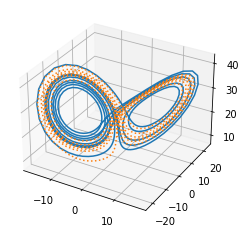

In [14]:
fig = plt.figure(facecolor="white")
ax = plt.axes(projection="3d")
ax.plot(
    u[:, 0],
    u[:, 1],
    u[:, 2]
)
ax.plot(
    test_preds[:, 0],
    test_preds[:, 1],
    test_preds[:, 2],
    linestyle="dotted"
)